### Exercise 1 - What is a perceptron? Be specific. ###

**Answer:** the first neural model in 1957. A perceptron is a neural network with a single layer of input linear neurons followed by an output unit based on the sign(x) function. It is a machine learning algorithm for binary classifiers. All the vectors are conventionally column-vectors; therefore, the dot product WT·xi transforms
the input into a scalar, then the bias is added, and the binary output is obtained using the step
function, which outputs 1 when z > 0 and 0 otherwise. If the output is wrong, a weight correction is applied. Weights are corrected to minimize loss. 

### Exercise 2 - What are the different types of perceptrons? Briefly describe each of them

**Answer:** Multi layer perceptron - Adding at least one non-linear layer between the input and output, but it can have multiple hidden layers. The flow of information begins in the first layer, always proceeds in the same direction, and ends at the output layer.<br>

Single layer perceptron - Has a single layer of input neurons and can only learn linearly seperable patterns unlike the multi-layer

### Exercise 3 - What is a hard margin in a support vector machine model? Be specific.

**Answer:** The goal of the SVM learning algorithm is to find boundary between classes so that there are fewer misclassification errors. When there are multiple boundaries and we need to decide which one is better, The goal of the margin of a linear classifier is to increase the width of the boundary before hitting a data point. The hard margins fits a model with no errors, while a soft margin will have some errors 

### Exercise 4 - The effectiveness of a support vector machine model depends on:

**Answer:** D) All the above

### Exercise 5 - What is/are true about kernel in SVM?

**Answer:** D) Letters a and c are both correct

### Exercise 6 - Answer the following questions using the framingham dataset. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors

In [1]:
#6a - Using the pandas library, read the csv data file and create a data-frame called heart.

import pandas as pd

heart = pd.read_csv('framingham(4).csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
#6b - Remove observations with missing values

heart = heart.dropna()

In [3]:
#6c - age, currentSmoker, totChol, BMI, and heartRate as predictor variables. TenYearCHD as the target variable

import numpy as np
from tqdm import tqdm
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#train_test_split
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']].copy()
Y = heart['TenYearCHD']

md1_results, md2_results, md3_results, md4_results = list(), list(), list(), list()

for i in tqdm(range(0, 100)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

    ### Model 1 ###
    md1 = make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes = (4,),
                                                      activation = 'tanh',
                                                      solver = 'sgd',
                                                      max_iter = 100,
                                                      batch_size = 500)).fit(X_train, Y_train)
    md1_pred = md1.predict_proba(X_test)[:, 1]
    md1_pred = np.where(md1_pred < 0.15, 0, 1)
    md1_results.append(recall_score(Y_test, md1_pred))

    
    ### Model 2 ###
    md2 = make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes = (4,),
                                                      activation = 'relu',
                                                      solver = 'sgd',
                                                      max_iter = 100,
                                                      batch_size = 500)).fit(X_train, Y_train)
    md2_pred = md2.predict_proba(X_test)[:, 1]
    md2_pred = np.where(md2_pred < 0.15, 0, 1)
    md2_results.append(recall_score(Y_test, md2_pred))

    
    ### Model 3 ###
    md3 = make_pipeline(MinMaxScaler(), SVC(kernel = 'rbf',
                                            probability = True)).fit(X_train, Y_train)
        
    md3_pred = md3.predict_proba(X_test)[:, 1]
    md3_pred = np.where(md3_pred < 0.15, 0, 1)
    md3_results.append(recall_score(Y_test, md3_pred))

    
    ### Model 4 ###
    md4 = make_pipeline(MinMaxScaler(), SVC(kernel = 'poly',
                                            probability = True)).fit(X_train, Y_train)
        
    md4_pred = md4.predict_proba(X_test)[:, 1]
    md4_pred = np.where(md4_pred < 0.15, 0, 1)
    md4_results.append(recall_score(Y_test, md4_pred))


  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
  2%|▏         | 2/100 [00:26<20:29, 12.55s/it]C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
  3%|▎         | 3/100 [00:38<19:59, 12.37s/it]C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_serve

Average recall for model 1 is  0.7325000000000002
Average recall for model 2 is  0.735625
Average recall for model 3 is  0.7397321428571427
Average recall for model 4 is  0.6385714285714286


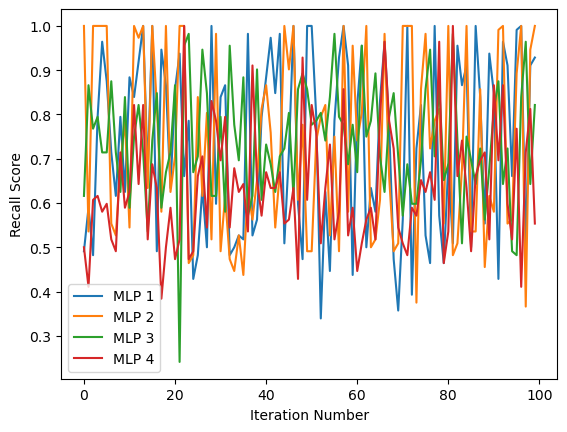

In [13]:
#6d - Create a visualization that shows the recall value for each of the models at each iteration. Also, report
# the average recall of each of the model for the 100 repetitions. What model would use to predict TenYearCHD?

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = [i for i in range(0, 100)], y = md1_results, label = 'MLP 1')
sns.lineplot(x = [i for i in range(0, 100)], y = md2_results, label = 'MLP 2')
sns.lineplot(x = [i for i in range(0, 100)], y = md3_results, label = 'MLP 3')
sns.lineplot(x = [i for i in range(0, 100)], y = md4_results, label = 'MLP 4')
plt.xlabel('Iteration Number')
plt.ylabel('Recall Score')

print('Average recall for model 1 is ', np.mean(md1_results))
print('Average recall for model 2 is ', np.mean(md2_results))
print('Average recall for model 3 is ', np.mean(md3_results))
print('Average recall for model 4 is ', np.mean(md4_results))

From the above, I would use model 3 since its recall is slightly higher than all the other ones.